__Aim:__ Consistency analysis across cell lines using pathway enrichment results to find commonly up/down regulated pathways and their genes. 

__tools__:
- https://github.com/goodarzilab/iPAGE
- https://github.com/goodarzilab/pypage
- https://github.com/abearab/pager

__other tools__:
- https://github.com/tanghaibao/goatools
- https://github.com/MaayanLab/blitzgsea
- https://gseapy.readthedocs.io/en/latest/index.html

___
<!-- source: https://www.nature.com/articles/s41586-021-03313-9/figures/9

I want something like module g

<img src="https://media.springernature.com/full/springer-static/esm/art%3A10.1038%2Fs41586-021-03313-9/MediaObjects/41586_2021_3313_Fig9_ESM.jpg?as=webp" width=600 >  -->

In [1]:
!mkdir -p page

In [2]:
import re
import sys
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from time import time 
from glob import glob
from matplotlib.pyplot import subplots
from itertools import chain
from functools import reduce
from venn import venn

sys.path.append('/data_gilbert/home/aarab/tools/pager/')

import upsetplot as us
import pager
from matplotlib.backends.backend_pdf import PdfPages

from IPython.display import IFrame

In [3]:
import pypage

In [4]:
pagerdir='/data_gilbert/home/aarab/tools/pager'

In [5]:
dictfilt = lambda x, y: dict([ (i,x[i]) for i in x if i in set(y) ])

In [6]:
from pypage import ExpressionProfile
from pypage import GeneSets
from pypage import PAGE

In [7]:
import pickle

def write_adata_pkl(data, name):
    file_name = f'{name}.pkl'
    with open(file_name, 'wb') as file:
        pickle.dump(data, file)
        print(f'Object successfully saved to "{file_name}"')


def read_adata_pkl(name):
    file_name = f'{name}.pkl'
    with open(file_name, 'rb') as f:
        data = pickle.load(f)
    return data

In [8]:
def load_annotation(ann_file):
    gs_ann = GeneSets(ann_file=ann_file, n_bins=3)
    return gs_ann


def load_expression(expression_file):
    df = pd.read_csv(expression_file,
                     sep="\t",
                     header=0,
                     names=["gene", "exp"])
    exp = ExpressionProfile(df.iloc[:, 0],
                            df.iloc[:, 1],
                            n_bins=10)
    # exp.convert_from_to('refseq', 'ensg', 'human')
    return exp


def run_pyPAGE(expression, annotation,threads=18):
    p = PAGE(
        expression,
        annotation,
        n_shuffle=1000,
        n_jobs=threads,
        # Hani: _"You must redo iPAGE with `--independence=0` option for comparing results between multiple smaples."_        
        filter_redundant=False
    )
    
    _,_ = p.run()
    
    return p

### Load genesets

In [9]:
# msigdb_c5_go = load_annotation(f'{pagerdir}/annotations/human/msigdb_v7.4_c5.go/c5.go.v7.4.symbols.gmt')
# msigdb_c5_go._calculate_pathway_sizes()

In [10]:
# msigdb_c5_go.filter_pathways(min_size=10,max_size=500)

In [11]:
# msigdb_c2_kegg = load_annotation(f'{pagerdir}/annotations/human/msigdb_v7.4_c2.cp.kegg/c2.cp.kegg.v7.4.symbols.gmt')

In [17]:
!ls {pagerdir}/annotations/human/msigdb_v7.4_c3.tft/

c3.tft.v7.4.symbols.gmt       msigdb_v7.4_c3.tft_names.txt
msigdb_v7.4_c3.tft_index.txt


In [18]:
msigdb_c3_tft = load_annotation(
    f'{pagerdir}/annotations/human/msigdb_v7.4_c3.tft/c3.tft.v7.4.symbols.gmt'
)

In [19]:
# msigdb_c5_gobp = load_annotation(f'{pagerdir}/annotations/human/msigdb_v7.4_c5.go.bp/c5.go.bp.v7.4.symbols.gmt')
# msigdb_c5_gobp._calculate_pathway_sizes()

In [20]:
# pd.Series(msigdb_c5_gobp.pathway_sizes).plot.hist(bins=200)
# plt.axvline(10, color='k', linestyle='dashed', linewidth=1)
# plt.axvline(500, color='k', linestyle='dashed', linewidth=1)

# plt.yscale('log')
# plt.show()

In [21]:
# msigdb_c5_gobp.filter_pathways(min_size=50,max_size=150)

## run pyPAGE

### $\Delta$Expression

In [22]:
exp_results = {}

for delta_exp in glob('exp/*delta_exp.txt'):
    msigdb_c3_tft.modified = False   # https://github.com/goodarzilab/pypage/issues/47#issuecomment-1699760555 
    name = delta_exp.split('/')[1].replace('_delta_exp.txt','')
    print(name)
    exp_results[name] = run_pyPAGE(load_expression(delta_exp),msigdb_c3_tft)
    print()

hl60_6h


permutation testing:  43%|████▎     | 491/1133 [05:21<07:01,  1.52it/s]
hypergeometric tests: 386it [00:01, 210.71it/s]



hl60_72h


permutation testing:  51%|█████     | 580/1133 [06:17<05:59,  1.54it/s]
hypergeometric tests: 479it [00:01, 254.47it/s]



kg1


permutation testing:  59%|█████▊    | 665/1133 [06:58<04:54,  1.59it/s]
hypergeometric tests: 530it [00:02, 258.95it/s]



molm13


permutation testing:  51%|█████     | 578/1133 [06:20<06:04,  1.52it/s]
hypergeometric tests: 475it [00:01, 254.19it/s]



molm14


permutation testing:  51%|█████     | 574/1133 [06:11<06:01,  1.55it/s]
hypergeometric tests: 459it [00:01, 251.41it/s]



ociaml3


permutation testing:  50%|█████     | 572/1133 [06:26<06:18,  1.48it/s]
hypergeometric tests: 454it [00:02, 211.85it/s]



skm1


permutation testing:  57%|█████▋    | 651/1133 [07:11<05:19,  1.51it/s]
hypergeometric tests: 526it [00:02, 245.77it/s]

In [24]:
write_adata_pkl(exp_results,'page/exp_results_msigdb_c3_tft')

Object successfully saved to "page/exp_results_msigdb_c3_tft.pkl"


### $\Delta$Stability

In [23]:
stbl_results = {}

for delta_stbl in glob('stbl/*delta_stbl.txt'):
    msigdb_c3_tft.modified = False   # https://github.com/goodarzilab/pypage/issues/47#issuecomment-1699760555 
    name = delta_stbl.split('/')[1].replace('_delta_stbl.txt','')
    print(name)
    stbl_results[name] = run_pyPAGE(load_expression(delta_stbl),msigdb_c3_tft)
    print()

hl60_120h


permutation testing:   4%|▎         | 40/1133 [00:09<04:29,  4.06it/s]
hypergeometric tests: 30it [00:00, 369.03it/s]



hl60_72h


permutation testing:   6%|▌         | 69/1133 [00:15<04:00,  4.42it/s]
hypergeometric tests: 46it [00:00, 349.54it/s]



hl60_6h


permutation testing:   7%|▋         | 84/1133 [00:20<04:15,  4.10it/s]
hypergeometric tests: 66it [00:00, 374.10it/s]



kg1


permutation testing:   3%|▎         | 38/1133 [00:09<04:31,  4.03it/s]
hypergeometric tests: 25it [00:00, 361.70it/s]



molm13


permutation testing:   6%|▌         | 63/1133 [00:14<04:08,  4.30it/s]
hypergeometric tests: 45it [00:00, 373.66it/s]



molm14


permutation testing:   3%|▎         | 38/1133 [00:09<04:20,  4.20it/s]
hypergeometric tests: 24it [00:00, 285.70it/s]



ociaml3


permutation testing:   9%|▉         | 104/1133 [00:24<04:04,  4.21it/s]
hypergeometric tests: 74it [00:00, 387.41it/s]



skm1


permutation testing:   3%|▎         | 35/1133 [00:08<04:29,  4.08it/s]
hypergeometric tests: 20it [00:00, 380.17it/s]

In [25]:
write_adata_pkl(stbl_results,'page/stbl_results_msigdb_c3_tft')

Object successfully saved to "page/stbl_results_msigdb_c3_tft.pkl"


In [27]:
ls -lh page/*pkl

-rw-rw-r--. 1 aarab aarab 2.4G Sep  6 00:17 page/exp_results_msigdb_c3_tft.pkl
-rw-rw-r--. 1 aarab aarab 1.3G Sep  5 21:27 page/exp_results_msigdb_c5_gobp_filt.pkl
-rw-rw-r--. 1 aarab aarab  11G Aug 31 18:25 page/exp_results_msigdb_c5_gobp.pkl
-rw-rw-r--. 1 aarab aarab 904M Sep  6 00:17 page/stbl_results_msigdb_c3_tft.pkl
-rw-rw-r--. 1 aarab aarab 647M Sep  5 21:28 page/stbl_results_msigdb_c5_gobp_filt.pkl
-rw-rw-r--. 1 aarab aarab 4.9G Aug 31 18:24 page/stbl_results_msigdb_c5_gobp.pkl


## Draw heatmaps
Fig. S4

In [701]:
pager.pvmat2bio_signal

<function pager.pvmat2bio_signal(pvmat, side, n_clust=2, thr=2)>

In [34]:
def pvmat2bio_signal(pvmat,side,n_clust=2,thr=2):
    if side == 'up':
        out = pvmat.loc[
            (pd.DataFrame(pvmat.iloc  [:,-n_clust:]  > thr).all(axis=1)) #& 
            # (pd.DataFrame(pvmat.iloc  [:,:-n_clust]  < thr).all(axis=1))
            ,:
        ].sort_values(by=pvmat.columns[-n_clust:].to_list()[::-1],ascending=False,axis=0)
    elif side == 'both':
        out = pvmat.loc[
            (pd.DataFrame(pvmat.iloc  [:,:n_clust]  > thr).all(axis=1)) & 
            (pd.DataFrame(pvmat.iloc  [:,-n_clust:]  > thr).all(axis=1)) & 
            (pd.DataFrame(pvmat.iloc  [:,n_clust+1:-n_clust]  < thr).all(axis=1))
            ,:
        ].sort_values(
            by=pvmat.columns[-n_clust:].to_list()[::-1] + pvmat.columns[:n_clust].to_list(),
            ascending=False,axis=0
        )
    elif side == 'down':
        out = pvmat.loc[
            (pd.DataFrame(pvmat.iloc  [:,:n_clust]  > thr).all(axis=1)) #& 
            # (pd.DataFrame(pvmat.iloc  [:,n_clust+1:]  < thr).all(axis=1))
            ,:
        ].sort_values(by=pvmat.columns[:n_clust].to_list(),ascending=False,axis=0)
    return out


In [28]:
def subset_results(p):
    return pd.concat([
        pvmat2bio_signal(
            p.get_es_matrix(),
            side=s,n_clust=n,
            thr = -np.log10(0.001)
        ) for s,n in zip(['up','down'],[1,2,3])
    ])


def draw_heatmap(es_matrix,cmap = 'viridis'):
    # https://github.com/goodarzilab/pypage/issues/46
    return pypage.heatmap.Heatmap(pathways=es_matrix.index,graphical_ar=es_matrix.to_numpy(),cmap_main = cmap)

### HL-60

In [29]:
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt

In [37]:
def make_page_heatmaps(page_results,mod,genesets='msigdb_c5_gobp'):
    max_val=-np.log10(0.0001)
    if mod == 'exp':
        modality = "RNA Expression"
    elif mod == 'stbl':
        modality = "RNA Stability"

    with PdfPages(f'page/{mod}_results_{genesets}.pdf') as pdf:
        draw_heatmap(subset_results(page_results['hl60_6h'])).show(title=f'{modality}\nHL-60 at 6h',max_val=max_val)
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()

        draw_heatmap(subset_results(page_results['hl60_72h'])).show(title=f'{modality}\nHL-60 at 72h',max_val=max_val)
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()

        draw_heatmap(subset_results(page_results['hl60_120h'])).show(title=f'{modality}\nHL-60 at 120h',max_val=max_val)
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()

        draw_heatmap(subset_results(page_results['molm13'])).show(title=f'{modality}\nMOLM-13',max_val=max_val)
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()

        draw_heatmap(subset_results(page_results['molm14'])).show(title=f'{modality}\nMOLM-14',max_val=max_val)
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()

        draw_heatmap(subset_results(page_results['kg1'])).show(title=f'{modality}\nKG-1',max_val=max_val)
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()

        draw_heatmap(subset_results(page_results['skm1'])).show(title=f'{modality}\nSKM-1',max_val=max_val)
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()

        draw_heatmap(subset_results(page_results['ociaml3'])).show(title=f'{modality}\nOCI-AML3',max_val=max_val)
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()

In [31]:
exp_results = read_adata_pkl('page/exp_results_msigdb_c3_tft')

In [32]:
stbl_results = read_adata_pkl('page/stbl_results_msigdb_c3_tft')

In [38]:
make_page_heatmaps(exp_results,'exp',genesets='msigdb_c3_tft')

/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/pypage/lib/python3.11/site-packages/pypage/heatmap.py:105: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  im = self.ax.imshow(np.atleast_2d(graphical_ar),


In [39]:
make_page_heatmaps(stbl_results,'stbl',genesets='msigdb_c3_tft')

/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/pypage/lib/python3.11/site-packages/pypage/heatmap.py:105: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  im = self.ax.imshow(np.atleast_2d(graphical_ar),
/data_gilbert/home/aarab/anaconda3/envs/mamba/envs/pypage/lib/python3.11/site-packages/pypage/heatmap.py:105: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  im = self.ax.imshow(np.atleast_2d(graphical_ar),


### Make sample vs pathway matrix
1. convert `page` results to single values => "PAGE enrichment score"

In [40]:
def get_PAGE_enrichment_score(page):
    es_bins = subset_results(page)[subset_results(page) > - np.log10(0.05)].fillna(0) * [-1,-1,-1,0,0,0,0,1,1,1]

    res = pd.DataFrame(es_bins.sum(axis=1),columns=['es'])
    
    return res

In [41]:
results = pd.concat(
    dict([(name,get_PAGE_enrichment_score(page)) for name, page in exp_results.items() if name != 'hl60_72h_only'])
).reset_index(names=['sample','pathway']).pivot_table(index='pathway',columns='sample',values='es').fillna(0)

In [42]:
# import seaborn as sns

In [43]:
# sns.clustermap(results, cmap='coolwarm', figsize=(7, 20), center=0,vmin=-10,vmax=10)

didn't look good :)

### onePAGE

### $\Delta$Expression

In [49]:
[(name,gs) for name, page in exp_results.items() for gs in subset_results(page).index]
 # if 'DIFFERENTIATION' in gs
# 'GOBP_CELL_MORPHOGENESIS_INVOLVED_IN_DIFFERENTIATION'

[('hl60_6h', 'HNF1_01'),
 ('hl60_120h', 'IGLV5_37_TARGET_GENES'),
 ('kg1', 'IGLV5_37_TARGET_GENES'),
 ('molm13', 'E47_02'),
 ('molm14', 'IGLV5_37_TARGET_GENES'),
 ('molm14', 'ZNF92_TARGET_GENES'),
 ('ociaml3', 'IGLV5_37_TARGET_GENES'),
 ('skm1', 'IGLV5_37_TARGET_GENES')]

In [50]:
results_bins = pd.concat(
    dict([(name,page.get_es_matrix()) for name, page in exp_results.items() if name not in ['hl60_72h_only','hl60_6h']])
).reset_index(names=['sample','pathway'])

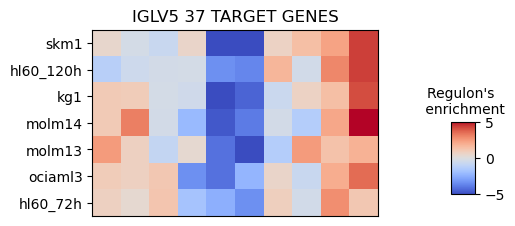

In [59]:
name = 'IGLV5_37_TARGET_GENES'

hm = draw_heatmap(
    results_bins.query(f'pathway == "{name}"').drop(columns=['pathway']).set_index('sample').sort_values([0],ascending=False),
    cmap='coolwarm'
)

hm.show(
    title=name.replace('_',' ').replace('IN ','\nIN '),
    # max_val=7
)

plt.savefig('page/exp_onePAGE_TF.pdf')

In [60]:
'","'.join(
    [gene 
     for genes in exp_results['skm1'].get_enriched_genes(
         'IGLV5_37_TARGET_GENES')[-2:]for gene in genes 
    ]
)

'ADAMTSL2","ADSS1","AHNAK","AMPD3","ATP2B2","ATP8B3","BNC1","BPIFB4","CCDC159","CCND2","CFAP74","CLEC2D","CNTFR","COL21A1","COL9A2","CPA4","CPHL1P","CRACR2B","CXCL12","CYP26B1","EFHD1","ERG","F2RL1","FAM83F","FBXO27","FGFR3","FSCN1","GAPDHP70","GAS7","GJA3","GRIN2A","HDAC10","HECW2","HHIP","HIVEP3","HRCT1","ID2","INHBA","KCNH1-IT1","KIAA1210","KLHL4","LARGE2","LFNG","LIMCH1","LINC00390","LINC00607","LINC01213","LINC01579","LINC01775","LINC02762","LINC02798","LINC02846","LRRC15","MOGAT3","MX2","NEFM","NFKBIA","NOS3","NOXA1","NPIPB8","OSGIN1","PHOSPHO1","PKD1L2","PLAAT5","PLXNC1","PNRC1","POLD4","POT1-AS1","PRCD","PTPRH","RAB7B","RIPOR3","RNVU1-30","SDCBP2","SERPINB9P1","SLC26A4","SMIM36","SPRED3","SRRM3","STARD10","SYCE3","UBE2E2-AS1","USHBP1","ADCY5","ALDH1A2","ASB2","ASIC4","ATP2B3","ATP6V0D2","ATXN1-AS1","BAHCC1","BAIAP3","BMX","BRINP2","C1QL4","CABP1","CAMK2B","CCDC152","CCDC187","CNGA1","COL13A1","COL16A1","COL9A3","CUEDC1","DLX6-AS1","DMTN","DTX1","EGFR","ELAVL3","ELN","ENTPD8","E

### $\Delta$Stability

In [63]:
[(name,gs) for name, page in stbl_results.items() for gs in subset_results(page).index]
 # if 'DIFFERENTIATION' in gs
# 'GOBP_CELL_MORPHOGENESIS_INVOLVED_IN_DIFFERENTIATION'

[('hl60_120h', 'TBP_01'),
 ('hl60_72h', 'TBP_01'),
 ('hl60_72h', 'GATA6_01'),
 ('hl60_72h', 'TGGAAA_NFAT_Q4_01'),
 ('hl60_72h', 'SREBP_Q3'),
 ('hl60_72h', 'MZF1_01'),
 ('hl60_6h', 'ZNF436_TARGET_GENES'),
 ('hl60_6h', 'NFKBIA_TARGET_GENES'),
 ('hl60_6h', 'AP1_C'),
 ('molm14', 'ACCTGTTG_UNKNOWN'),
 ('ociaml3', 'AACTTT_UNKNOWN'),
 ('ociaml3', 'PAX6_01'),
 ('ociaml3', 'PAX3_TARGET_GENES'),
 ('ociaml3', 'COMP1_01'),
 ('skm1', 'SUPT20H_TARGET_GENES')]

In [65]:
results_bins = pd.concat(
    dict([(name,page.get_es_matrix()) for name, page in stbl_results.items() if name not in ['hl60_72h_only','hl60_6h']])
).reset_index(names=['sample','pathway'])

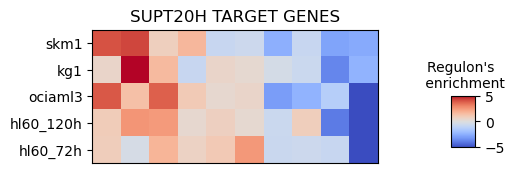

In [68]:
name = 'SUPT20H_TARGET_GENES'

draw_heatmap(
    results_bins.query(f'pathway == "{name}"').drop(columns=['pathway']).set_index('sample').sort_values([0],ascending=False),
    cmap='coolwarm'
).show(
    title=name.replace('_',' ').replace('IN ','\nIN '),
    # max_val=7
)

# plt.savefig('page/stbl_onePAGE_DIFFERENTIATION.eps')

In [546]:
# dict([(name,page.get_es_matrix()) for name, page in stbl_results.items() if name not in ['hl60_72h_only','hl60_6h']])

In [56]:
# [
#     (name,gs) 
#     for name, page in stbl_results.items() 
#     for gs in page.get_es_matrix().index 
#     # if 'DIFFERENTIATION' in gs
# ]

In [659]:
'","'.join(
    [gene 
     for genes in exp_results['hl60_120h'].get_enriched_genes(
         'GOBP_FAT_CELL_DIFFERENTIATION')[-2:]for gene in genes 
    ]
)

'ADRB2","ARID5B","BBS9","CCDC71L","CCND1","DDIT3","DKKL1","GATA2","GPER1","HTR2C","KLF4","LRG1","MEDAG","MIR548D1","OSBPL11","PIM1","PLCB1","PPARD","PPARG","PPARGC1A","SMAD6","TNF","ZBTB7C","ALOX5","ARNTL","CCN4","DIO2","EGR2","FFAR2","FGF10","FOXO1","GNB3","HES1","INHBB","KLF5","MAFB","NR4A3","PDGFRA","PTGS2","RGS2","SIX1","SOCS1","SORT1","SOX13","STEAP4","SULT1E1","TFAP2B","TGFB1I1","TRIB2","TRIM32","WNT1","WNT5B","YAP1","ZC3H12A","ZFP36L1","ZFPM1'

In [631]:
'","'.join(
    [gene 
     for genes in exp_results['molm13'].get_enriched_genes(
         'GOBP_CHONDROCYTE_DIFFERENTIATION')[-2:]for gene in genes 
    ]
)

'BMP2","COL27A1","ECM1","FGFR3","GDF6","HMGA2","MBOAT2","MDK","NFIB","RARB","SMAD3","SMPD3","TSKU","WNT2B","ACVRL1","ADAMTS12","ADAMTS7","AXIN2","CCN4","CHADL","GREM1","IHH","MAF","MATN1","MUSTN1","OSR1","OSR2","SCX","SNAI2","SOX5","SULF1","SULF2","TGFBI","WNT5B","WNT9A","ZNF219'

In [ ]:
         page.get_enriched_genes(
             'GOBP_CELL_MORPHOGENESIS_INVOLVED_IN_DIFFERENTIATION'
         )[-2:]

In [615]:
up_genes = dict([
    (name,list(
        [gene for genes in 
         page.get_enriched_genes(
             'GOBP_CELL_MORPHOGENESIS_INVOLVED_IN_DIFFERENTIATION'
         )[-2:] for gene in genes
        ]
    ))
    for name, page in exp_results.items() if name not in ['hl60_72h_only','hl60_6h']
])

In [616]:
from upsetplot import from_contents,UpSet

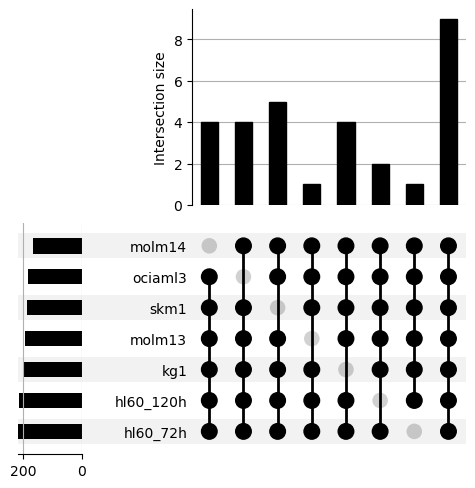

In [617]:
UpSet(
    from_contents(up_genes),min_degree=6
).plot()

plt.show()

In [618]:
d = from_contents(up_genes).reset_index().set_index('id')

In [623]:
'","'.join(
    d[d.sum(axis=1).gt(5)].index.to_list()
)

'BRSK1","CSF1R","DOK4","FEZ1","ID1","ITGB7","MDK","NTNG2","PTCH1","RIPOR2","SEMA3D","TUBB3","DMTN","EFNB2","EGR2","EPHA2","FZD7","GATA1","GBP1","KIAA0319","KIF5A","L1CAM","LRRK2","NPTX1","NTRK1","RAP1GAP","S100A6","S100B","SPTBN5","ARC'

___
# 

In [527]:
!date

Mon Sep  4 03:54:55 PDT 2023
